# Logistic Regression with Python 

For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


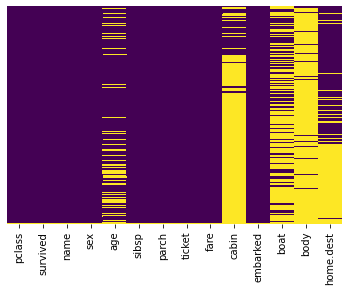

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

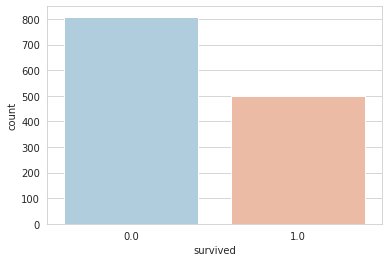

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df, palette='RdBu_r')

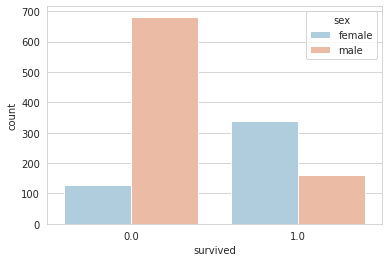

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

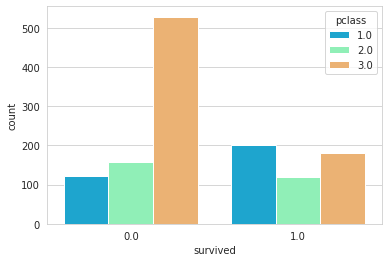

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

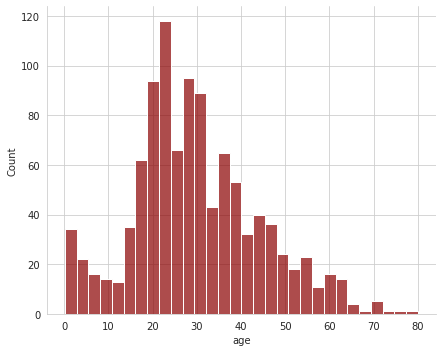

In [12]:
sns.displot(data=df, x=df['age'].dropna(), kde=False, fill=True, color='darkred', bins=30, height=5, aspect=1.25, alpha = 0.7)

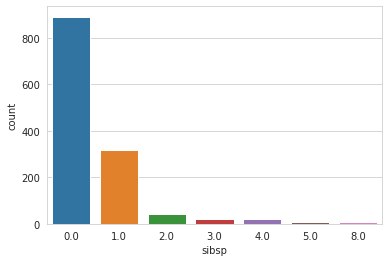

In [13]:
sns.countplot(x='sibsp',data=df)

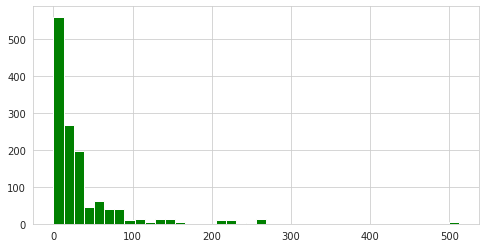

In [14]:
df['fare'].hist(color='green',bins=40,figsize=(8,4))

import sys
locate_python = sys.exec_prefix
print(locate_python)
python -m pip install cufflinks

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
df['age'].iplot(kind='hist',bins=30,color='green')

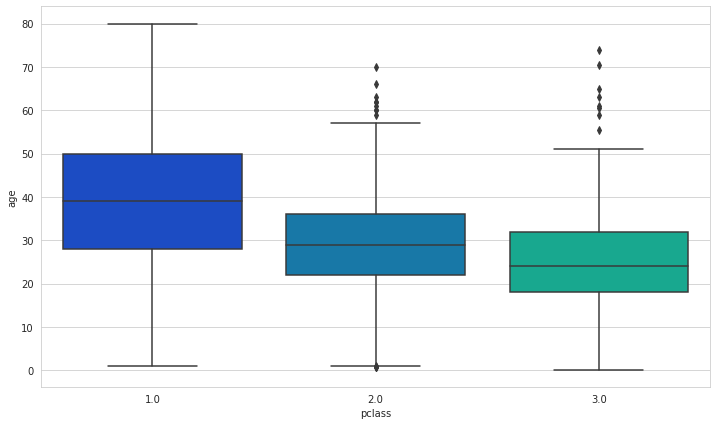

In [17]:
plt.figure(figsize=(12, 7))
bp = sns.boxplot(x='pclass',y='age',data=df,palette='winter')

In [18]:
medians = df.groupby(['pclass'])['age'].median()
medians

pclass
1.0    39.0
2.0    29.0
3.0    24.0
Name: age, dtype: float64

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

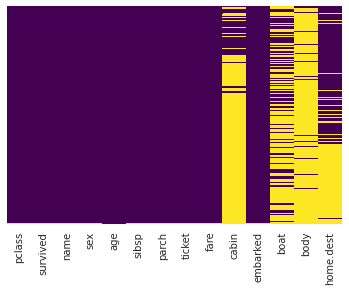

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [23]:
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis =1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1310 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(6), object(4)
memory usage: 102.5+ KB


In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   float64
 6   parch     1306 non-null   float64
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.2+ KB


In [27]:
sex = pd.get_dummies(df['sex'], drop_first = True)
embarked = pd.get_dummies(df['embarked'], drop_first = True)

In [28]:
df.drop(['sex', 'embarked', 'name', 'ticket'], axis=1, inplace=True)

In [29]:
df = pd.concat([df, sex, embarked], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   float64
 4   parch     1306 non-null   float64
 5   fare      1306 non-null   float64
 6   male      1306 non-null   uint8  
 7   Q         1306 non-null   uint8  
 8   S         1306 non-null   uint8  
dtypes: float64(6), uint8(3)
memory usage: 75.2 KB


In [31]:
df['Q']

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Q, Length: 1306, dtype: uint8

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis=1),
                                                    df['survived'], test_size=0.30,
                                                    random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
from tables.group import ProxyDict
accuracy_score(y_test, predictions)

0.8086734693877551

In [37]:
confusion_matrix(y_test, predictions)

array([[210,  37],
       [ 38, 107]])

In [38]:
#[TN  FP
# FN  TP]

In [39]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       247
         1.0       0.74      0.74      0.74       145

    accuracy                           0.81       392
   macro avg       0.79      0.79      0.79       392
weighted avg       0.81      0.81      0.81       392



In [40]:
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)
#f1_score = 2 * (precision * recall / (precision + recall)) (Harmonic mean)